**Plan**

**1. Understanding convolutional layers**

**2. Pooling layers and spatial reduction**

**3. Building and training a CNN model**


# **Understanding convolutional layers**

Convolutional layers are fundamental building blocks in Convolutional Neural Networks (CNNs), which are widely used in image recognition, image classification, and other computer vision tasks. Convolutional layers are designed to automatically and adaptively learn spatial hierarchies of features from input images. Here's a detailed explanation of convolutional layers in Keras:

**<h2>1. What is a Convolutional Layer?</h2>**

A convolutional layer applies convolution operations to the input, using a set of filters (also known as kernels) to produce output feature maps. Each filter is a small matrix that slides over the input image, computing dot products between the entries of the filter and the input, resulting in an activation map.

**<h2>2. Key Components of a Convolutional Layer</h2>**

- **Filters/Kernels**: Small matrices that slide over the input data to detect specific features.
- **Stride**: The step size with which the filter moves across the input image.
- **Padding**: The addition of extra pixels around the input image to control the spatial size of the output feature map.
- **Activation Function**: Introduces non-linearity to the output.

**<h2>3. Parameters of a Convolutional Layer in Keras</h2>**

- **filters**: Number of filters (output feature maps) in the convolution.
- **kernel_size**: Size of the filters (height and width).
- **strides**: Stride of the convolution along the height and width.
- **padding**: One of `"valid"` (no padding) or `"same"` (padding such that the output has the same size as the input).
- **activation**: Activation function to apply after the convolution operation.
- **input_shape**: Shape of the input data (required only for the first layer).



**<h2>4. Example of Convolutional Layers in Keras</h2>**

Here is an example of how to use convolutional layers in a Keras model:



In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu',
                 input_shape=(28, 28, 1)))

# Add a second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1),
                 padding='same', activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(units=128, activation='relu'))

# Add an output layer
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

**<h2>5. Detailed Breakdown of the Example</h2>**

1. **First Convolutional Layer**:
   - `filters=32`: The layer will learn 32 different filters.
   - `kernel_size=(3, 3)`: Each filter has a size of 3x3.
   - `strides=(1, 1)`: The filter moves 1 pixel at a time.
   - `padding='same'`: Zero-padding is added to keep the output size the same as the input size.
   - `activation='relu'`: ReLU activation function is applied.
   - `input_shape=(28, 28, 1)`: The input images are 28x28 pixels with 1 color channel (grayscale).

2. **Second Convolutional Layer**:
   - Similar to the first layer, but with 64 filters.

3. **MaxPooling Layer**:
   - `pool_size=(2, 2)`: The pooling window is 2x2.
   - `strides=(2, 2)`: The window moves 2 pixels at a time, reducing the spatial dimensions by half.

4. **Flatten Layer**:
   - Flattens the 2D output from the previous layer into a 1D vector to be fed into a fully connected (dense) layer.

5. **Dense Layers**:
   - The first dense layer has 128 neurons with ReLU activation.
   - The output layer has 10 neurons with softmax activation, suitable for multi-class classification.

**<h2>6. Understanding the Convolution Operation</h2>**

The convolution operation involves sliding a filter over the input image and computing the dot product between the filter and the local region of the image it covers. The resulting values form the feature map. This process helps in detecting edges, textures, and other features at different locations in the image.

**<h2>7. Visualization of Filters and Feature Maps</h2>**

Convolutional layers automatically learn the filters during training. These filters can detect various features such as edges, textures, and patterns. The deeper layers in the network can learn more complex and abstract features.

**<h2>Conclusion</h2>**

Convolutional layers are essential for processing image data, allowing neural networks to learn hierarchical spatial features. By understanding how to configure and use convolutional layers in Keras, you can build powerful models for various computer vision tasks.

# **Pooling layers and spatial reduction**

Pooling layers are an essential component in Convolutional Neural Networks (CNNs). They perform down-sampling operations along the spatial dimensions (width and height) of the input volume, reducing the dimensions of the feature maps, which helps in reducing the computational cost and controlling overfitting. Here's a detailed explanation of pooling layers and spatial reduction in Keras:

**<h2>1. What is a Pooling Layer?</h2>**

A pooling layer reduces the dimensionality of each feature map but retains the most critical information. The primary types of pooling are:

- **Max Pooling**: Takes the maximum value in each patch of each feature map.
- **Average Pooling**: Takes the average value in each patch of each feature map.

**<h2>2. Key Components of a Pooling Layer</h2>**

- **Pool Size**: The dimensions of the window (height and width) over which the pooling operation is applied.
- **Strides**: The step size with which the pooling window moves across the input.
- **Padding**: The method to handle the borders of the input. The common types are "valid" (no padding) and "same" (padding to keep the output size the same as the input size).

**<h2>3. Parameters of a Pooling Layer in Keras</h2>**

- **pool_size**: Size of the pooling window.
- **strides**: Stride of the pooling operation along the height and width.
- **padding**: One of `"valid"` (no padding) or `"same"` (with padding).

**<h2>4. Max Pooling in Keras</h2>**

Max pooling is the most common type of pooling, often used in CNN architectures. It selects the maximum value from each patch of the feature map.

**<h2>Example of Max Pooling</h2>**

```python
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Add more layers as needed
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
```

In this example:
- **MaxPooling2D**: Reduces the dimensions of the feature map by taking the maximum value in each 2x2 window.

**<h2>5. Average Pooling in Keras</h2>**

Average pooling computes the average value of each patch of the feature map, which can be useful for some tasks but is less common than max pooling.

**<h2>Example of Average Pooling</h2>**

```python
from keras.layers import AveragePooling2D

# Add an average pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
```

**<h2>6. Effects of Pooling Layers</h2>**

- **Dimensionality Reduction**: Pooling layers reduce the spatial dimensions (width and height) of the feature maps, which leads to a reduction in the number of parameters and computational cost.
- **Translation Invariance**: Pooling provides a form of spatial invariance to the input, which helps the network to recognize features regardless of their position.
- **Overfitting Control**: By reducing the complexity of the model, pooling layers help in controlling overfitting.



**<h2>7. Example of a Complete CNN with Pooling Layers</h2>**

Here’s an example of a complete CNN architecture that uses both convolutional and pooling layers:


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers followed by pooling layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)



**<h2>Conclusion</h2>**

Pooling layers play a crucial role in CNNs by reducing the spatial dimensions of feature maps, which helps in reducing computational costs, controlling overfitting, and introducing some spatial invariance. Max pooling is the most commonly used pooling operation, but average pooling can be useful in certain contexts. Understanding how to use these layers effectively allows you to design powerful and efficient CNN architectures for a variety of computer vision tasks.

# **Building and training a CNN model**

In [14]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling Layer
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,050 (433.79 KB)

 Trainable params: 111,050 (433.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=1,
                    validation_data=(x_test, y_test))

# Print training history
print(history.history.keys())

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 133ms/step - accuracy: 0.2219 - loss: 2.0495 - val_accuracy: 0.3126 - val_loss: 1.8379
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(x_test[:5])
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3175 - loss: 1.8356
Test loss: 1.8378698825836182
Test accuracy: 0.3125999867916107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
[[4.4808593e-02 3.5149208e-01 4.2398885e-02 2.9463502e-02 3.9004676e-02
  2.1312088e-02 2.3595448e-01 1.6337203e-02 5.5229872e-02 1.6399860e-01]
 [7.9322085e-02 2.2900465e-01 9.0436975e-04 8.8678833e-05 1.7995755e-04
  4.1876374e-05 7.4892094e-05 5.6480163e-05 6.1852694e-01 7.1800053e-02]
 [1.7326228e-01 2.2308953e-01 1.6697278e-02 5.3165755e-03 7.6834946e-03
  3.3684261e-03 3.8260655e-03 3.7246696e-03 4.3298250e-01 1.3004924e-01]
 [1.4441927e-01 1.7689510e-01 4.0018889e-03 6.9228752e-04 1.2168341e-03
  3.5140984e-04 4.3334169e-04 3.9310649e-04 5.8661246e-01 8.4984310e-02]
 [1.5982015e-02 1.2533837e-02 1.5129319e-01 4.5721848e-02 2.2987565e-01
  2.5857270e-02 4.7005633e-01 3.2911059e-02 6.2897904e-03 9.4789909e-03]]


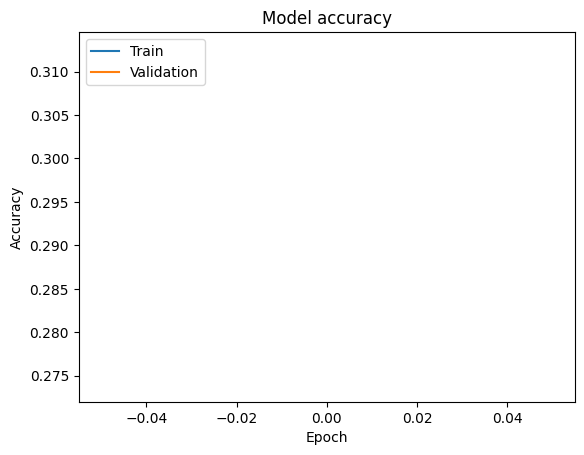

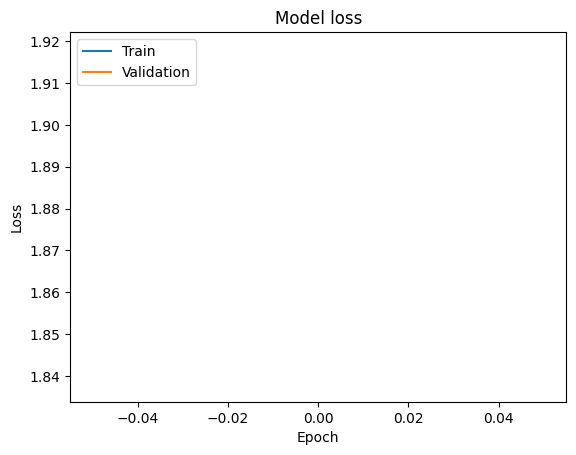

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()